In [14]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot')

import glob

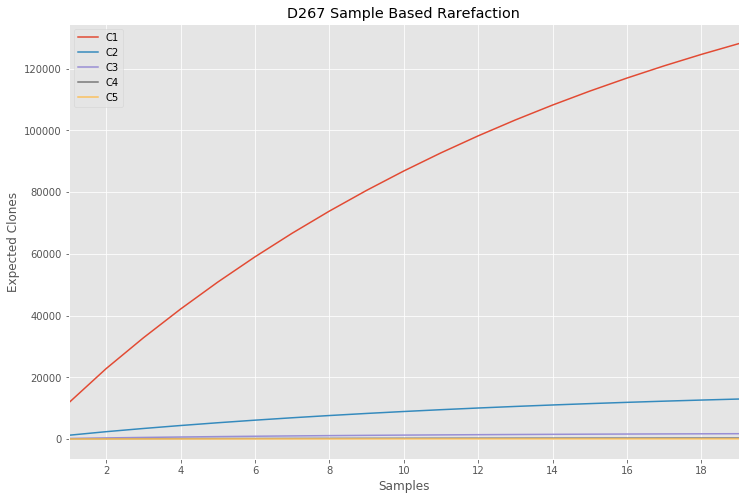

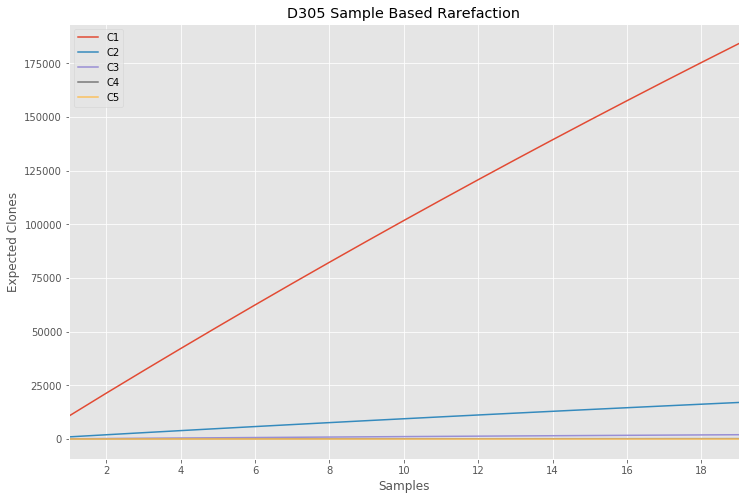

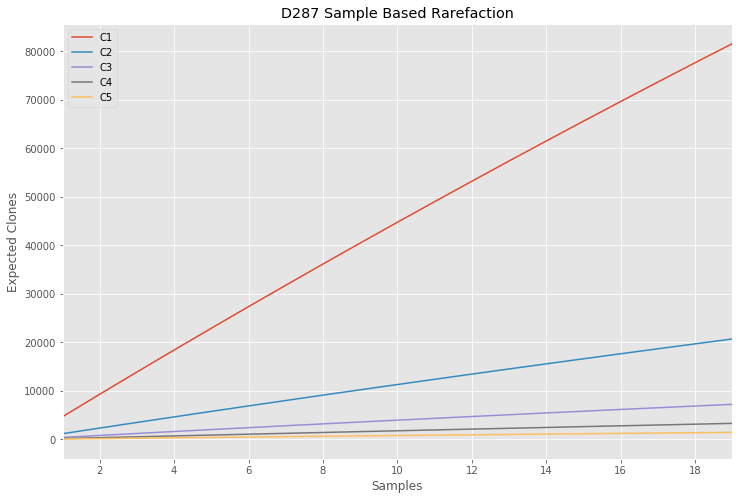

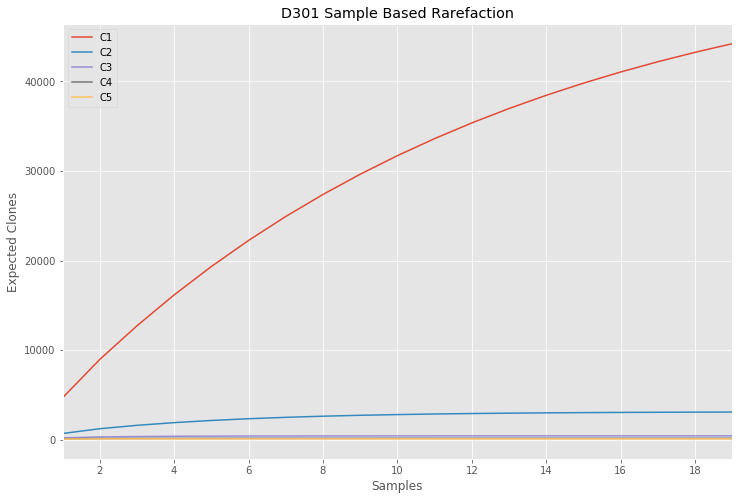

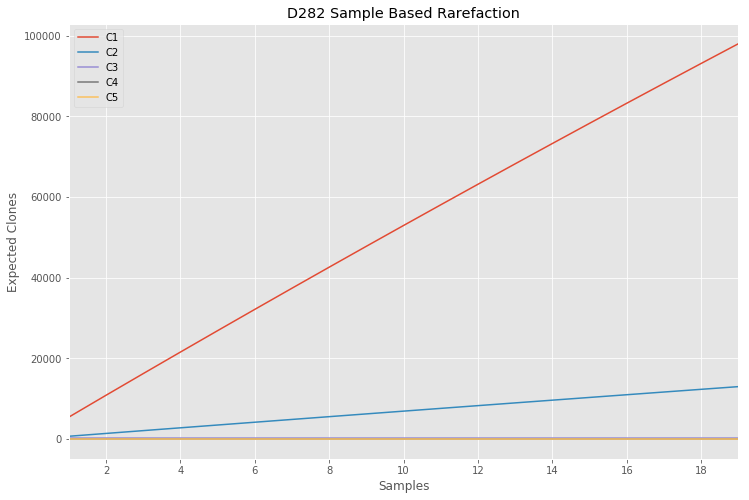

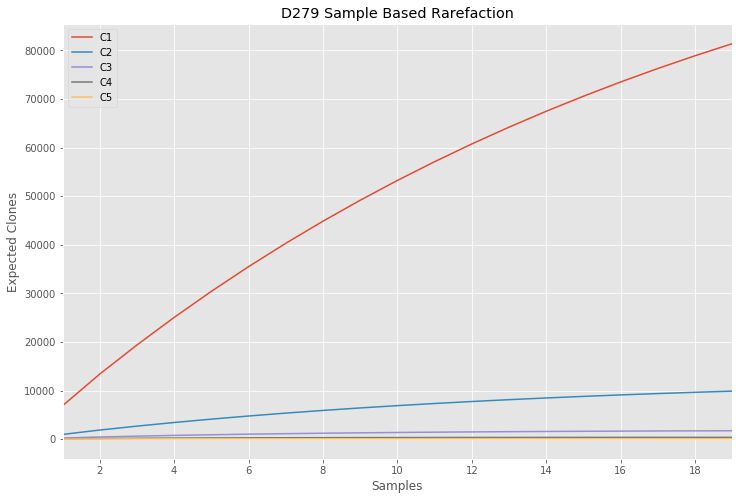

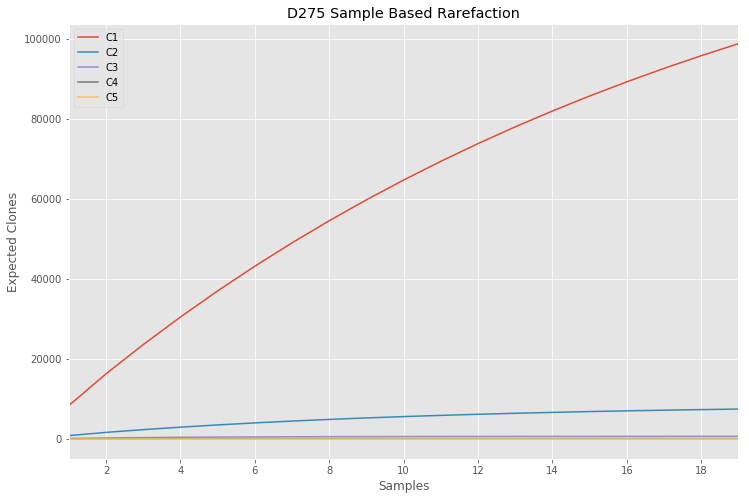

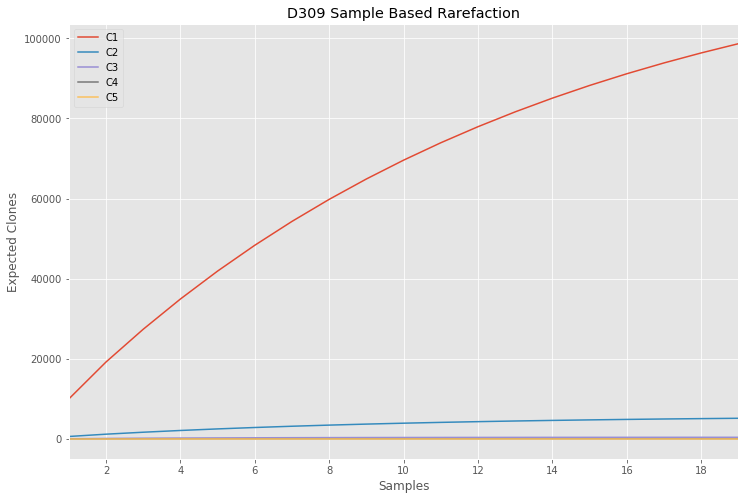

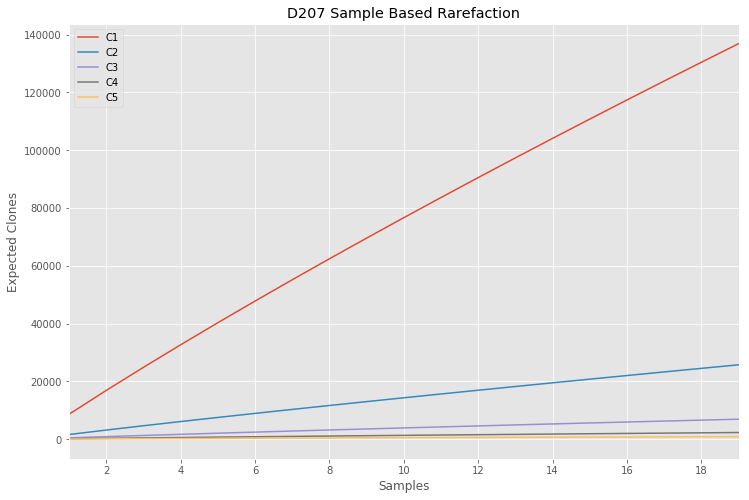

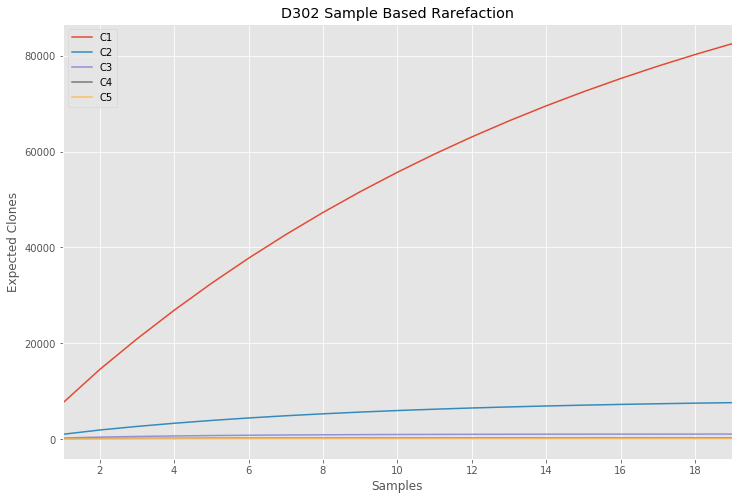

In [35]:
for fn in glob.glob('rf*.tsv'):
    sub = fn.split('_')[1].split('.')[0]
    df = pd.read_csv(fn, sep='\t', index_col='subsample')
    df.columns = [c.split('_')[1].replace('.tsv', '') for c in df.columns]
    ax = df.plot.line(figsize=(12, 8), xlim=(1, 19))
    ax.set_title('{} Sample Based Rarefaction'.format(sub))
    ax.set_xlabel('Samples')
    ax.set_ylabel('Expected Clones')
    plt.savefig('{}_rarefaction.pdf'.format(sub), bbox_inches='tight')

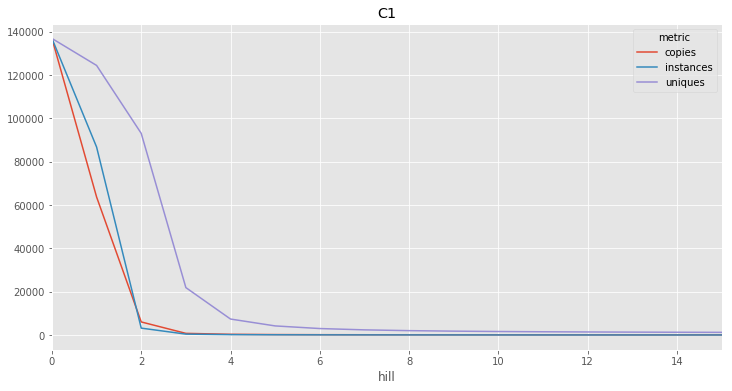

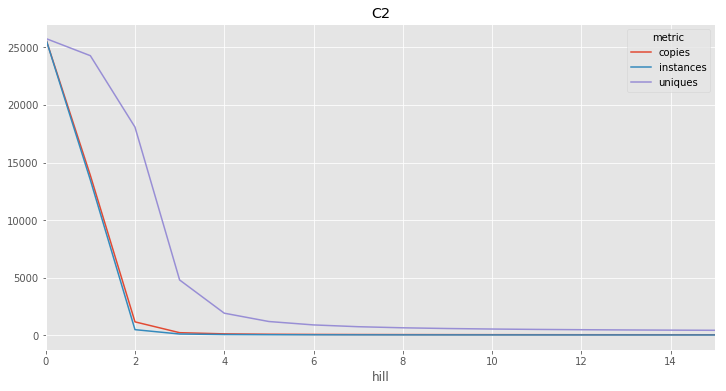

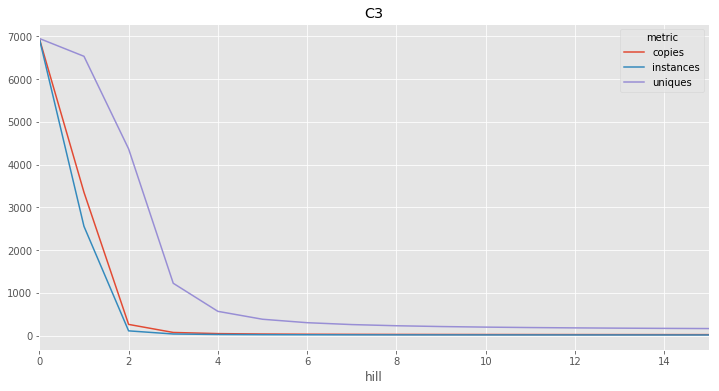

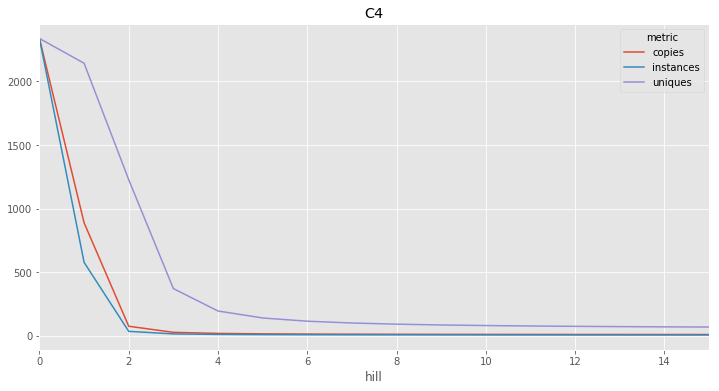

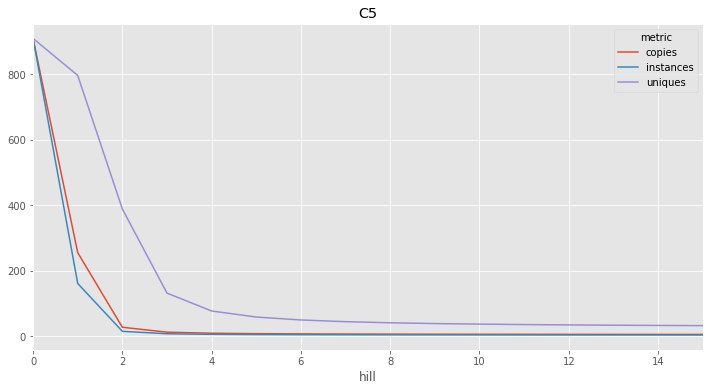

In [129]:
dfs = {fn: pd.read_csv(fn, sep='\t') for fn in glob.glob('diversity*.tsv')}
df = pd.concat(dfs).reset_index().drop('level_1', axis=1).rename({'level_0': 'metric'}, axis=1).set_index('hill')
df.metric = df.metric.str.replace('diversity_', '')
df.metric = df.metric.str.replace('.tsv', '')

for cutoff in df.cutoff.unique():
    pdf = df[(df.cutoff == cutoff)][['metric', 'diversity']]
    fig, ax = plt.subplots(figsize=(12,6))
    for metric in pdf.metric.unique():
        pdf[pdf.metric == metric].pivot(columns='metric', values='diversity').plot.line(ax=ax)
    ax.set_title(cutoff)
    ax.set_xlim((0, 15))
    fig.savefig('diversity_{}.pdf'.format(cutoff), bbox_inches='tight')